### 2019.07.08 阴天 

In [1]:
from __future__ import print_function
import torch as t
t.__version__


'1.1.0'

### １．加法操作

In [2]:
#构建一个矩阵
x = t.Tensor(5, 3)#此时只是创建了一个矩阵空间

x = t.Tensor([[1, 2],
              [3, 4]])
x

tensor([[1., 2.],
        [3., 4.]])

In [3]:
#初始化一个均匀分布的值
x = t.rand(5, 3)

x

tensor([[0.3899, 0.1846, 0.1172],
        [0.4831, 0.4523, 0.2371],
        [0.5206, 0.7400, 0.1981],
        [0.8090, 0.4691, 0.4191],
        [0.4961, 0.9796, 0.5130]])

In [4]:
print(x.size()) #输出矩阵的大小
print(x.size(1)) #输出矩阵的列数目

torch.Size([5, 3])
3


In [5]:
y = t.rand(5, 3)
y
y + x


tensor([[1.2519, 0.8773, 0.4163],
        [1.4806, 1.3840, 0.3218],
        [0.5293, 1.0375, 0.4459],
        [1.7801, 1.2719, 0.9495],
        [0.6458, 1.2361, 1.4585]])

In [6]:
t.add(x, y)

tensor([[1.2519, 0.8773, 0.4163],
        [1.4806, 1.3840, 0.3218],
        [0.5293, 1.0375, 0.4459],
        [1.7801, 1.2719, 0.9495],
        [0.6458, 1.2361, 1.4585]])

In [7]:
#加法的第三种操作

#1. 申请一个空间
result = t.Tensor(5, 3)
#2. 放入数据到空闲的空间之中
t.add(x, y, out=result)

result

tensor([[1.2519, 0.8773, 0.4163],
        [1.4806, 1.3840, 0.3218],
        [0.5293, 1.0375, 0.4459],
        [1.7801, 1.2719, 0.9495],
        [0.6458, 1.2361, 1.4585]])

In [8]:
#加法的操作
print("原始的值")
print(y)

print("普通的加法操作")
y.add(x)#相当于y + x
print(y)

print("改变值的加法操作")
y.add_(x)#相当于y = y+x
print(y)

原始的值
tensor([[0.8620, 0.6926, 0.2990],
        [0.9976, 0.9316, 0.0848],
        [0.0087, 0.2974, 0.2478],
        [0.9711, 0.8028, 0.5304],
        [0.1496, 0.2565, 0.9456]])
普通的加法操作
tensor([[0.8620, 0.6926, 0.2990],
        [0.9976, 0.9316, 0.0848],
        [0.0087, 0.2974, 0.2478],
        [0.9711, 0.8028, 0.5304],
        [0.1496, 0.2565, 0.9456]])
改变值的加法操作
tensor([[1.2519, 0.8773, 0.4163],
        [1.4806, 1.3840, 0.3218],
        [0.5293, 1.0375, 0.4459],
        [1.7801, 1.2719, 0.9495],
        [0.6458, 1.2361, 1.4585]])


In [9]:
a = t.ones(5)#创建全一矩阵
print(a)
print(a.size())

tensor([1., 1., 1., 1., 1.])
torch.Size([5])


### ２．数据转换处理

In [10]:
#装换数据格式
b = a.numpy() #Tenxor->Numpy
b

array([1., 1., 1., 1., 1.], dtype=float32)

In [11]:
import numpy as np
a = np.ones(5)
b = t.from_numpy(a) # Numpy->Tensor
print(a)
print(b)

[1. 1. 1. 1. 1.]
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


In [12]:
#此时b是从a装换得到，所以他们共享内存
b.add_(1)
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


### ３．scalar

In [13]:
scalar = b[0]#获得一个元素值（类型为Tensor）
print(b)
print("------------")
print(scalar)
scalar.size() #没有维度

tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
------------
tensor(2., dtype=torch.float64)


torch.Size([])

In [14]:
scalar.item()#可以转变为一个真实的数值

2.0

In [15]:
tensor = t.tensor([2])#注意区别
tensor, scalar

(tensor([2]), tensor(2., dtype=torch.float64))

In [16]:
print("输出相应的值:")
tensor.size(), scalar.size()

输出相应的值:


(torch.Size([1]), torch.Size([]))

In [17]:
tensor.item(), scalar.item() #输出元素的值

(2, 2.0)

In [18]:
#初始化一个Tensor
tensor = t.tensor([3,4])


In [19]:
scalar = t.tensor(3)
scalar

tensor(3)

### 4．数据拷贝

In [20]:
#不改变原始数据　深拷贝
old_tensor = tensor
new_tenxor = old_tensor.clone()#复制一个Tensor区别与以往所有的Tensor
#new_tenxor = t.tensor(old_tensor)# 方法改进
new_tenxor[0] = 1111
old_tensor, new_tenxor


(tensor([3, 4]), tensor([1111,    4]))

In [21]:
#浅层拷贝　原始数据会被修改
old_tensor = tensor
new_tenxor = old_tensor.detach()#复制一个Tensor区别与以往所有的Tensor
#new_tenxor = t.tensor(old_tensor)# 方法改进
new_tenxor[0] = 1111
old_tensor, new_tenxor

(tensor([1111,    4]), tensor([1111,    4]))

### ５．Gpu的使用

In [22]:
#使用gpu
device = t.device("cuda:0 " if t.cuda.is_available() else "cpu")
x = x.to(device)
y = y.to(device)
z = x + y
print(z)

tensor([[1.6419, 1.0619, 0.5335],
        [1.9637, 1.8363, 0.5589],
        [1.0498, 1.7775, 0.6440],
        [2.5890, 1.7410, 1.3686],
        [1.1419, 2.2157, 1.9715]], device='cuda:0')


### ６．自动求导

In [23]:
#1.设置自动求导的标志
#x = t.ones(2, 2, requires_grad=True)
#x
#2.第二种求导方式
x = t.ones(2, 2)
x.requires_grad = True
x

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

In [24]:
y = x.sum()
print(y)

tensor(4., grad_fn=<SumBackward0>)


In [25]:
y.grad_fn

In [26]:
y.backward()
x.grad#每一次的梯度都是累加之后的值

tensor([[1., 1.],
        [1., 1.]])

In [27]:
x.grad.data.zero_()


tensor([[0., 0.],
        [0., 0.]])

In [28]:
y.backward()
x.grad

tensor([[1., 1.],
        [1., 1.]])

### ７．神经网络

In [29]:
import torch.nn as nn
import torch.nn.functional as F

#0.继承nn.Moudle类
class Net(nn.Module):
    
    def __init__(self):
        #1.初始化父类的初始化函数
        super(Net, self).__init__()
        
        self.conv1 = nn.Conv2d(1, 6, 5)# channels output filter
        self.conv2 = nn.Conv2d(6, 16, 5)
        #2.全连接/仿射层
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    #3.前向传播
    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        
        x = x.view(x.size()[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
net = Net()
print(net)




Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [30]:
#输出学习参数个数
params = list(net.parameters())
print(len(params))

10


In [31]:
#输出可学习的参数的和名称
for name, parameters in net.named_parameters():
    print(name , ":", parameters.size())

conv1.weight : torch.Size([6, 1, 5, 5])
conv1.bias : torch.Size([6])
conv2.weight : torch.Size([16, 6, 5, 5])
conv2.bias : torch.Size([16])
fc1.weight : torch.Size([120, 400])
fc1.bias : torch.Size([120])
fc2.weight : torch.Size([84, 120])
fc2.bias : torch.Size([84])
fc3.weight : torch.Size([10, 84])
fc3.bias : torch.Size([10])


In [32]:
input = t.randn(1, 1, 32, 32)
out = net(input)
out.size()

torch.Size([1, 10])

In [33]:
net.zero_grad # 清零梯度操作
out.backward(t.ones(1, 10))# ＢＰ



### 7.1损失函数

In [68]:
# 1.对于真实数据和预测数据的准备
output = net(input)
target = t.arange(0, 10).view(1, 10)# 变为一个一行十列的矩阵
#target = target.float()
#print(t.arange(0, 10).size())
#print(target.size())
#２．计算误差函数
criterion = nn.MSELoss()
loss = criterion(output, target)
loss #总误差值

RuntimeError: Given groups=1, weight of size 6 3 5 5, expected input[1, 1, 32, 32] to have 3 channels, but got 1 channels instead

In [35]:
# 运行反向传播算法得到梯度值
#1. 清零参数值
net.zero_grad()
#2. 比较数值
print("Bias 1 的梯度值（before）")
print(net.conv1.bias.grad)#输出conv1的偏值的梯度
#3. BP
loss.backward()
print("Bias 1 的梯度值（After）")
print(net.conv1.bias.grad)

Bias 1 的梯度值（before）
tensor([0., 0., 0., 0., 0., 0.])
Bias 1 的梯度值（After）
tensor([ 0.0373,  0.0624,  0.0693,  0.0328, -0.1343, -0.0646])


### 7.２优化参数

In [38]:
import torch.optim as optim
optimizer = optim.SGD(net.parameters(), lr=0.01)
#train 清零梯度值
optimizer.zero_grad()

#前向传播
out = net(input)
#计算loss
loss = criterion(output, target)
#计算方向传播
loss.backward()
#更新参数
optimizer.step()

RuntimeError: Trying to backward through the graph a second time, but the buffers have already been freed. Specify retain_graph=True when calling backward the first time.

### 小试牛刀　CIFAR-10分类

**具体步骤：**
1. 使用torchvision加载并预处理CIFAR-10数据集
2. 定义网络
3. 定义损失函数和优化器
4. 训练网络并更新网络参数
5. 测试网络

In [39]:
import torchvision as tv
import torchvision.transforms as transforms
from torchvision.transforms import ToPILI｜mage
show = ToPILImage()#实现Tensor 装换为IMage

SyntaxError: invalid character in identifier (<ipython-input-39-d658eb1014ec>, line 3)

In [40]:
#数据预处理
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5), (0.5, 0.5, 0.5)),#归一化
])

# 训练集
trainset = tv.datasets.CIFAR10(
                    root='/home/gavin/Pytorch/data/CIFAR10/cifar-10-python/', 
                    train=True, 
                    download=False,
                    transform=transform)

trainloader = t.utils.data.DataLoader(
                    trainset, 
                    batch_size=4,
                    shuffle=True, 
                    num_workers=2)

# 测试集
testset = tv.datasets.CIFAR10(
                    '/home/gavin/Pytorch/data/CIFAR10/cifar-10-python/',
                    train=False, 
                    download=False, 
                    transform=transform)

testloader = t.utils.data.DataLoader(
                    testset,
                    batch_size=4, 
                    shuffle=False,
                    num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

ship


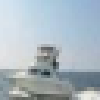

In [41]:
#显示一张图片效果
(data, label) = trainset[100]
print(classes[label])
#print((data+1)/2)
#归一化并且显示图片
show((data + 1) / 2).resize((100, 100))

       frog        frog         cat        ship


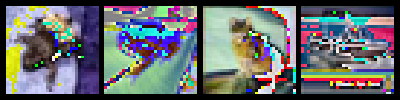

In [45]:
dataiter = iter(trainloader)
images, labels = dataiter.next() #四张图片及其标签
print(' '.join('%11s'%classes[labels[j]] for j in range(4)))
show(tv.utils.make_grid((images + 1/2))).resize((400, 100))

In [46]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5) 
        self.conv2 = nn.Conv2d(6, 16, 5)  
        self.fc1   = nn.Linear(16*5*5, 120)  
        self.fc2   = nn.Linear(120, 84)
        self.fc3   = nn.Linear(84, 10)

    def forward(self, x): 
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2)) 
        x = F.max_pool2d(F.relu(self.conv2(x)), 2) 
        x = x.view(x.size()[0], -1) 
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)        
        return x


net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [47]:
from torch import optim
criterion = nn.CrossEntropyLoss()#定义Loss 
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum = 0.9)#优化参数

### 训练网络

In [48]:
t.set_num_threads(8)
for epoch in range(2):  
    
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        
        # 输入数据
        inputs, labels = data
        
        # 梯度清零
        optimizer.zero_grad()
        
        # forward + backward 
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()   
        
        # 更新参数 
        optimizer.step()
        
        # 打印log信息
        # loss 是一个scalar,需要使用loss.item()来获取数值，不能使用loss[0]
        running_loss += loss.item()
        if i % 2000 == 1999: # 每2000个batch打印一下训练状态
            print('[%d, %5d] loss: %.3f' \
                  % (epoch+1, i+1, running_loss / 2000))
            running_loss = 0.0
print('Finished Training')
# c此处只是在cpu进行训练

[1,  2000] loss: 2.158
[1,  4000] loss: 1.870
[1,  6000] loss: 1.673
[1,  8000] loss: 1.604
[1, 10000] loss: 1.525
[1, 12000] loss: 1.475
[2,  2000] loss: 1.399
[2,  4000] loss: 1.371
[2,  6000] loss: 1.314
[2,  8000] loss: 1.309
[2, 10000] loss: 1.292
[2, 12000] loss: 1.294
Finished Training


实际的label:       cat     ship     ship    plane


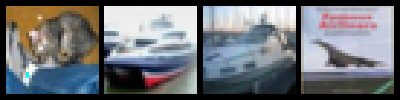

In [49]:
dataiter = iter(testloader)
images, labels = dataiter.next() # 一个batch返回4张图片
print('实际的label: ', ' '.join(\
            '%08s'%classes[labels[j]] for j in range(4)))
show(tv.utils.make_grid(images / 2 - 0.5)).resize((400,100))

In [57]:
#预测图片
outputs = net(images)
_, predicted = t.max(outputs.data, 1)
for i in range(4):
    print("预测结果：",classes[predicted[i]])


预测结果： cat
预测结果： ship
预测结果： ship
预测结果： ship


In [63]:
#批量化测试图片
correct = 0
total = 0

with t.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = t.max(outputs, 1)
        total += labels.size(0)
            
        correct += (predicted==labels).sum()
        
        
print('10000张测试集中的准确率为: %d %%' % (100 * correct / total))
print(outputs.size())
print(labels)
        

10000张测试集中的准确率为: 55 %
torch.Size([4, 10])
tensor([3, 5, 1, 7])


### GPU 上测试


In [92]:
import torchsnooper




device = t.device("cuda:0" if t.cuda.is_available() else "cpu")

net.to(device)
images = images.to(device)
labels = labels.to(device)
output = net(images)
output = output.float()
labels = labels.float()
@torchsnooper.snoop()
loss= criterion(output,labels)

loss

SyntaxError: invalid syntax (<ipython-input-92-b38613ce000f>, line 15)